In [60]:
# Importing Necessary Libraries
from pymongo import MongoClient
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
mongo.list_database_names()

['admin',
 'autosaurus',
 'classDB',
 'config',
 'epa',
 'fruits_db',
 'garden_db',
 'local',
 'met',
 'petsitly_marketing',
 'team_1_db',
 'travel_db',
 'uk_food',
 'wine']

In [4]:
db = mongo['wine']
db.list_collection_names()

['ratings']

In [5]:
#assign the collection to a variable
wine_df = db['ratings']

In [6]:
cursor = db["ratings"].find({})
json_data = list(cursor)

In [7]:
wine_df = pd.DataFrame(json_data)
wine_df.head()

,_id,country,description,points,price,province,region,title,variety,winery,rating_category,type,vintage
0,663af692e8d6239274b71533,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Good,White,2012
1,663af692e8d6239274b71534,US,"Rustic and dry, this has flavors of berries, c...",86,50,California,Dry Creek Valley,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,Good,Red,2010
2,663af692e8d6239274b71535,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Good,Red,2011
3,663af692e8d6239274b71536,US,"This shows a tart, green gooseberry flavor tha...",86,20,California,Sonoma Valley,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,Good,White,2011
4,663af692e8d6239274b71537,Italy,This concentrated Cabernet offers aromas of cu...,86,21,Sicily & Sardinia,Sicilia,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,Good,Red,2010


In [8]:
# Drop the non-beneficial ID columns
wine_df = wine_df.drop(columns = ['_id','description','title', 'winery', 'region'])
wine_df.head()

,country,points,price,province,variety,rating_category,type,vintage
0,France,87,27,Alsace,Pinot Gris,Good,White,2012
1,US,86,50,California,Red Blend,Good,Red,2010
2,US,87,19,California,Cabernet Sauvignon,Good,Red,2011
3,US,86,20,California,Sauvignon Blanc,Good,White,2011
4,Italy,86,21,Sicily & Sardinia,Cabernet Sauvignon,Good,Red,2010


In [9]:
wine_df['target'] =wine_df['points']>=90
wine_df.tail()

,country,points,price,province,variety,rating_category,type,vintage,target
77926,US,90,20,California,Chardonnay,Very Good,White,2013,True
77927,France,90,28,Alsace,Pinot Gris,Very Good,White,2013,True
77928,France,90,57,Alsace,Pinot Gris,Very Good,White,2010,True
77929,US,90,35,California,Chardonnay,Very Good,White,2013,True
77930,US,90,75,Oregon,Pinot Noir,Very Good,Red,2004,True


In [10]:
wine_df = wine_df.drop(columns = ['points','rating_category', 'province', 'type'])

In [11]:
wine_df.head()

,country,price,variety,vintage,target
0,France,27,Pinot Gris,2012,False
1,US,50,Red Blend,2010,False
2,US,19,Cabernet Sauvignon,2011,False
3,US,20,Sauvignon Blanc,2011,False
4,Italy,21,Cabernet Sauvignon,2010,False


In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  77931 non-null  object
 1   price    77931 non-null  int64 
 2   variety  77931 non-null  object
 3   vintage  77931 non-null  object
 4   target   77931 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.5+ MB


In [13]:
wine_df['vintage'].unique()

array(['2012', '2010', '2011', '2009', '2013', '2015', '2014', 'No Year',
       '2007', '2016', '2008', '2003', '2001', '2004', '2006', '2005',
       '2002', '1887', '1999', '1991', '1997', '2000', '2017', '1996',
       '1998', '1995', '1994', '1992', '1990', '1988', '1872', '1989',
       '1993', '1882', '1985', '1904', '1986', '1987', '1919', '1945'],
      dtype=object)

In [14]:
wine_df['vintage'] = wine_df['vintage'].replace('No Year', pd.NA)
wine_df.head()

,country,price,variety,vintage,target
0,France,27,Pinot Gris,2012,False
1,US,50,Red Blend,2010,False
2,US,19,Cabernet Sauvignon,2011,False
3,US,20,Sauvignon Blanc,2011,False
4,Italy,21,Cabernet Sauvignon,2010,False


In [15]:
wine_df['vintage'].unique()

array(['2012', '2010', '2011', '2009', '2013', '2015', '2014', <NA>,
       '2007', '2016', '2008', '2003', '2001', '2004', '2006', '2005',
       '2002', '1887', '1999', '1991', '1997', '2000', '2017', '1996',
       '1998', '1995', '1994', '1992', '1990', '1988', '1872', '1989',
       '1993', '1882', '1985', '1904', '1986', '1987', '1919', '1945'],
      dtype=object)

In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  77931 non-null  object
 1   price    77931 non-null  int64 
 2   variety  77931 non-null  object
 3   vintage  75256 non-null  object
 4   target   77931 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.5+ MB


In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
wine_dummies_df = pd.get_dummies(wine_df, dtype = int)
wine_dummies_df.head()

,price,target,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,variety_Bordeaux-style Red Blend,...,vintage_2008,vintage_2009,vintage_2010,vintage_2011,vintage_2012,vintage_2013,vintage_2014,vintage_2015,vintage_2016,vintage_2017
0,27,False,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,False,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,19,False,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,20,False,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,21,False,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
wine_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   price                             77931 non-null  int64
 1   target                            77931 non-null  bool 
 2   country_Argentina                 77931 non-null  int32
 3   country_Australia                 77931 non-null  int32
 4   country_Canada                    77931 non-null  int32
 5   country_France                    77931 non-null  int32
 6   country_Italy                     77931 non-null  int32
 7   country_Spain                     77931 non-null  int32
 8   country_US                        77931 non-null  int32
 9   variety_Bordeaux-style Red Blend  77931 non-null  int32
 10  variety_Cabernet Franc            77931 non-null  int32
 11  variety_Cabernet Sauvignon        77931 non-null  int32
 12  variety_Champagne Blend         

## Deep Learning

### Creating same X_train/X_test groups from model traiing and testing

In [20]:
# Split our preprocessed data into our features and target arrays
y = wine_dummies_df['target']
X = wine_dummies_df.drop (columns = 'target')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
#Loading trained model
loaded_model = tf.keras.models.load_model('../model.h5')

In [24]:
# Compile the model
loaded_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = loaded_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

609/609 - 1s - 2ms/step - accuracy: 0.7601 - loss: 0.4843
Loss: 0.48433375358581543, Accuracy: 0.7600985765457153


In [26]:
predictions = loaded_model.predict(X_test_scaled)
predictions

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.87382543],
       [0.18974209],
       [0.20263824],
       ...,
       [0.24701363],
       [0.4866395 ],
       [0.5457623 ]], dtype=float32)

In [34]:
pred_df = pd.DataFrame(predictions, columns = ['prob'])

pred_df.head()

,prob
0,0.873825
1,0.189742
2,0.202638
3,0.892877
4,0.718307


In [28]:
def threshold(prob): 
    if prob < .5: 
        return False
    else: 
        return True

In [38]:
pred_df['prediction'] = pred_df.apply(lambda x: threshold(x['prob']), axis = 1)

In [39]:
pred_df

,prob,prediction
0,0.873825,True
1,0.189742,False
2,0.202638,False
3,0.892877,True
4,0.718307,True
...,...,...
19478,0.695797,True
19479,0.251033,False
19480,0.247014,False
19481,0.486639,False


In [31]:
y_test = y_test.reset_index(drop = True)
y_test

0        False
1         True
2        False
3         True
4        False
         ...  
19478    False
19479    False
19480    False
19481    False
19482     True
Name: target, Length: 19483, dtype: bool

In [40]:
cf_matrix = tf.math.confusion_matrix(y_test,pred_df['prediction'])
cf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9739, 1964],
       [2710, 5070]])>

In [41]:
cf_matrix_np = cf_matrix.numpy()

In [52]:
cf_matrix_np

array([[9739, 1964],
       [2710, 5070]])

In [51]:
cf_matrix_np[0][0]

9739

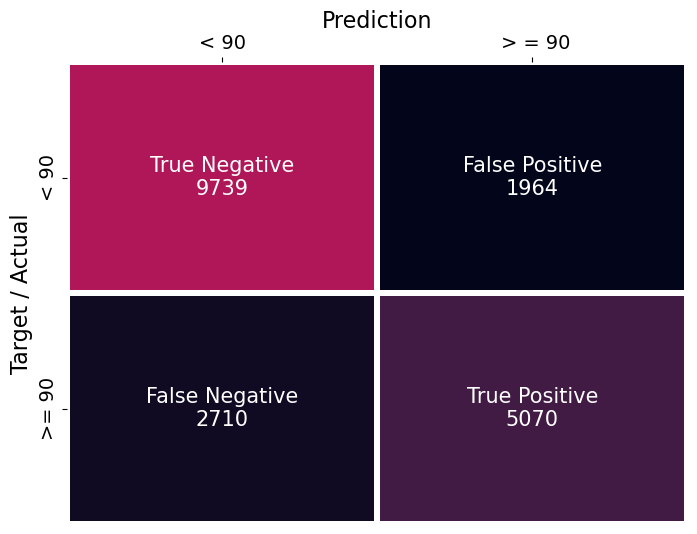

In [103]:
plt.figure(figsize=(8, 6))
text_size = {'size': 15}
fig = sns.heatmap(cf_matrix_np, fmt = '4', cbar = False, linewidth = 3, cmap = 'rocket',
    xticklabels = ['< 90', ' > = 90'], yticklabels = ['< 90','>= 90'], vmax = 20000,
    annot = [[f"True Negative\n{cf_matrix_np[0][0]}",f"False Positive\n{cf_matrix_np[0][1]}"],
            [f"False Negative\n{cf_matrix_np[1][0]}",f"True Positive\n{cf_matrix_np[1][1]}"]],
              annot_kws=text_size)
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Target / Actual', fontsize = 16)
fig.xaxis.set_ticks_position("top")
fig.xaxis.set_label_position('top') 
plt.yticks(fontsize=14)
plt.xticks(fontsize = 14)

plt.savefig('../../Flask_app/static/img/confusion_matrix.png', transparent = True)
plt.show()